In [ ]:
#Q1-A
#Find a Gale-Shapley implementation in python on Github and modify it so that the eight Super Group 1 teams will be matched against the eight Super Group 2 teams. 
#You can make up the preference  lists for each team. 
#Make sure you cite any code you use or state that you wrote it from scratch if you  did.  

In [ ]:
# credit: https://github.com/Lancelotl/Gale-Shapley/blob/master/stable_matching.py
# Wikipedia: https://en.m.wikipedia.org/wiki/Gale%E2%80%93Shapley_algorithm


In [1]:
from typing import List, Dict, Tuple

# Declaring types

Person = str
People = List[Person]
Preferences = List[Person]
Side = Dict[Person, Preferences]
Participants = Dict[str, Side]
Pair = Tuple[Person, Person]
Matching = Dict[Person, Person]
Stable_Matching = List[Pair]


class MissingPreferences(Exception):
    pass


def other_side(current_side: str, all_sides: list) -> str:
    """Given a side and all possible sides, returns the opposite side"""
    for s in all_sides:
        if s != current_side:
            return s


def all_preferences(participants: Participants) -> bool:
    """Checks whether all participants have all participants of the other side in their own preference"""
    sides = list(participants.keys())
    for side, people in participants.items():
        other_side_participants = participants[other_side(side, sides)]
        for name, preferences in people.items():
            for o in other_side_participants:
                if o not in preferences:
                    return False
    else:
        return True


def is_free(person: Person, engaged: Matching) -> bool:
    """Is the person missing from all current pairs?"""
    return person not in engaged


def current_match(person: Person, engaged: Matching) -> bool:
    """Returns the current match for that person"""
    return engaged.get(person)


def free_participants(people: People, engaged: Matching) -> list:
    """Returns all participants are that are still currently free"""
    return filter(lambda x: x not in engaged, people)


def preferred(a: Person, b: Person, preferences: Preferences) -> Person:
    """Is a preferred over b according to the preferences ordering?"""
    for preference in preferences:
        if preference == a:
            return True
        if preference == b:
            return False


def stable_matching(participants: Participants) -> Stable_Matching:
    """For a group of participants and their respective preferences of the other group, returns a list of stable matches according to the Gale–Shapley algorithm"""
    # The algorithm requires each participant expresses a preference that includes all other participants
    if not all_preferences(participants):
        raise MissingPreferences

    sides = list(participants.keys())
    proposing = sides[0]  # Taking the 1st side
    receiving = sides[1]  # Taking the 2nd side
    proposers = participants[proposing]
    receivers = participants[receiving]
    free_proposers = proposers
    proposal_history = {k: {} for k in proposers}
    engagements = {}

    while free_proposers:
        for proposer in free_proposers:
            preferences = proposers[proposer]
            for target in preferences:
                # Has proposed yet?
                if target not in proposal_history[proposer]:
                    # Record proposal
                    proposal_history[proposer][target] = ""
                    # Is receiver free?
                    if is_free(target, engagements):
                        # Engagement
                        engagements[proposer] = target
                        engagements[target] = proposer
                    else:
                        # Pair already exists
                        current = current_match(target, engagements)
                        target_preferences = receivers[target]
                        if preferred(proposer, current, target_preferences):
                            # Proposer replaces the current individual
                            engagements[target] = proposer
                            engagements[proposer] = target
                            # Freeing the incumbent
                            del engagements[current]
                    # Done proposing this round
                    break
        # Updating the list of proposers that are free
        # Must be a list since a generator always evaluates to True
        free_proposers = list(free_participants(free_proposers, engagements))

    # Composing the stable matchings
    stable_matchings = set()
    for a, b in engagements.items():
        # Checking the reverse isn't already in
        if (b, a) not in stable_matchings:
            stable_matchings.add((a, b))


    return list(stable_matchings)

if __name__ == "__main__":
    sample_participants = {
        "Super_Group_A": {
            "A1": [
                "B7", "B5", "B6", "B8", "B4", "B2", "B3", "B1"
            ],
            "A2": [
                "B7", "B6", "B8", "B4", "B2", "B1", "B3", "B5"
            ],
            "A3": [
                "B6", "B5", "B4", "B3", "B2", "B1", "B8", "B7"
            ],
            "A4": [
                "B3", "B1", "B2", "B5", "B4", "B7", "B6", "B8"
            ],
            "A5": [
                "B2", "B3", "B5", "B4", "B8", "B1", "B6", "B7"
            ],
            "A6": [
                "B8", "B1", "B3", "B4", "B2", "B7", "B6", "B5"
            ],
            "A7": [
                "B4", "B2", "B1", "B7", "B8", "B6", "B3", "B5"
            ],
            "A8": [
                "B1", "B2", "B3", "B4", "B8", "B7", "B6", "B5"
            ]
        },
        "Super_Group_B": {
            "B1": [
                "A6", "A5", "A7", "A4", "A2", "A1", "A3", "A8"
            ],
            "B2": [
                "A5", "A7", "A4", "A6", "A2", "A1", "A3", "A8"
            ],
            "B3": [
                "A4", "A5", "A8", "A6", "A2", "A1", "A3", "A7"
            ],
            "B4": [
                "A8", "A3", "A1", "A4", "A2", "A6", "A7", "A5"
            ],
            "B5": [
                "A1", "A3", "A5", "A4", "A2", "A7", "A6", "A8"
            ],
            "B6": [
                "A2", "A4", "A6", "A3", "A5", "A1", "A7", "A8"
            ],
            "B7": [
                "A7", "A2", "A3", "A4", "A8", "A1", "A6", "A5"
            ],
            "B8": [
                "A3", "A1", "A6", "A4", "A2", "A7", "A5", "A8"
            ]
        }
    }
    results = stable_matching(sample_participants)
    print(results)

[('B7', 'A2'), ('A4', 'B3'), ('A7', 'B4'), ('A6', 'B8'), ('A8', 'B1'), ('A1', 'B5'), ('A5', 'B2'), ('A3', 'B6')]


In [ ]:
# Q10: Part B:Use a loop to shuffle the preference lists for each team 1000 times. 
# Calculate the percentage of  stable playoff matches. See the function random.shuffle(x[, random])   

#REF: Modified an existing Gale-Shapley implementation from - Stable marriage problem - Rosetta Code

In [52]:
import random
import time
from typing import List, Dict, Tuple


# store starting time
begin = time.time()

# Declaring types
Person = str
People = List[Person]
Preferences = List[Person]
Side = Dict[Person, Preferences]
Participants = Dict[str, Side]
Pair = Tuple[Person, Person]
Matching = Dict[Person, Person]
Stable_Matching = List[Pair]


class MissingPreferences(Exception):
    pass

def other_side(current_side: str, all_sides: list) -> str:
    """Given a side and all possible sides, returns the opposite side"""
    for s in all_sides:
        if s != current_side:
            return s
     
def all_preferences(participants: Participants) -> bool:
    """Checks whether all participants have all participants of the other side in their own preference"""
    sides = list(participants.keys())
    for side, people in participants.items():
        other_side_participants = participants[other_side(side, sides)]
        for name, preferences in people.items():
            for o in other_side_participants:
                if o not in preferences:
                    return False
    else:
        return True
 
def is_free(person: Person, engaged: Matching) -> bool:
    """Is the person missing from all current pairs?"""
    return person not in engaged

def current_match(person: Person, engaged: Matching) -> bool:
    """Returns the current match for that person"""
    return engaged.get(person)

def free_participants(people: People, engaged: Matching) -> list:
    """Returns all participants are that are still currently free"""
    return filter(lambda x: x not in engaged, people)

def preferred(a: Person, b: Person, preferences: Preferences) -> Person:
    """Is a preferred over b according to the preferences ordering?"""
    for preference in preferences:
        if preference == a:
            return True
        if preference == b:
            return False

def stable_matching(participants: Participants) -> Stable_Matching:
    """For a group of participants and their respective preferences of the other group, returns a list of stable matches according to the Gale–Shapley algorithm"""
    # The algorithm requires each participant expresses a preference that includes all other participants
    if not all_preferences(participants):
        raise MissingPreferences

    sides = list(participants.keys())
    proposing = sides[0]  # Taking the 1st side
    receiving = sides[1]  # Taking the 2nd side
    proposers = participants[proposing]
    receivers = participants[receiving]
    free_proposers = proposers
    proposal_history = {k: {} for k in proposers}
    engagements = {}

    while free_proposers:
        for proposer in free_proposers:
            preferences = proposers[proposer]
            for target in preferences:
                # Has proposed yet?
                if target not in proposal_history[proposer]:
                    # Record proposal
                    proposal_history[proposer][target] = ""
                    # Is receiver free?
                    if is_free(target, engagements):
                        # Engagement
                        engagements[proposer] = target
                        engagements[target] = proposer
                    else:
                        # Pair already exists
                        current = current_match(target, engagements)
                        target_preferences = receivers[target]
                        if preferred(proposer, current, target_preferences):
                            # Proposer replaces the current individual
                            engagements[target] = proposer
                            engagements[proposer] = target
                            # Freeing the incumbent
                            del engagements[current]
                    # Done proposing this round
                    break
        # Updating the list of proposers that are free
        # Must be a list since a generator always evaluates to True
        free_proposers = list(free_participants(free_proposers, engagements))

    # Composing the stable matchings
    stable_matchings = set()
    for a, b in engagements.items():
        # Checking the reverse isn't already in
        if (b, a) not in stable_matchings:
            stable_matchings.add((a, b))


    return list(stable_matchings)

if __name__ == "__main__":
    listA = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8"]
    listB = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8"]
    results = []
    count = 0
    for i in range(1000):        
        sample_participants = {
            "Super_Group_A": {
                "A1": random.sample(listB,8),
                "A2": random.sample(listB,8),
                "A3": random.sample(listB,8),
                "A4": random.sample(listB,8),
                "A5": random.sample(listB,8),
                "A6": random.sample(listB,8),
                "A7": random.sample(listB,8),
                "A8": random.sample(listB,8)
            },
            "Super_Group_B": {
                "B1": random.sample(listA,8),
                "B2": random.sample(listA,8),
                "B3": random.sample(listA,8),
                "B4": random.sample(listA,8),
                "B5": random.sample(listA,8),
                "B6": random.sample(listA,8),
                "B7": random.sample(listA,8),
                "B8": random.sample(listA,8)
            }
        }
        result = stable_matching(sample_participants)
        results.append(result)

    for result in results:
        if result is not results[-1]:
            count += 1
    p = count/1000
    print("Percentage of stable playoff matches: ",p)
    
    time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begin} seconds")

Percentage of stable playoff matches:  0.999
Total runtime of the program is 1.1301610469818115 seconds


In [ ]:
#Q 10: Part E: Double the size of the lists in problem A several times (you can make up team names like team1, team2, etc.) and measure the amount of time it takes to create stable matches. 
# How fast does the  execution time grow in relation to the size of the lists?


In [51]:
import random
from typing import List, Dict, Tuple
import time
from random import randint

list1 = [randint(0,1000) for i in range(8000)]


# store starting time
begin = time.time()
times=[]

# Declaring types
Person = str
People = List[Person]
Preferences = List[Person]
Side = Dict[Person, Preferences]
Participants = Dict[str, Side]
Pair = Tuple[Person, Person]
Matching = Dict[Person, Person]
Stable_Matching = List[Pair]


class MissingPreferences(Exception):
    pass

def other_side(current_side: str, all_sides: list) -> str:
    """Given a side and all possible sides, returns the opposite side"""
    for s in all_sides:
        if s != current_side:
            return s
     
def all_preferences(participants: Participants) -> bool:
    """Checks whether all participants have all participants of the other side in their own preference"""
    sides = list(participants.keys())
    for side, people in participants.items():
        other_side_participants = participants[other_side(side, sides)]
        for name, preferences in people.items():
            for o in other_side_participants:
                if o not in preferences:
                    return False
    else:
        return True
 
def is_free(person: Person, engaged: Matching) -> bool:
    """Is the person missing from all current pairs?"""
    return person not in engaged

def current_match(person: Person, engaged: Matching) -> bool:
    """Returns the current match for that person"""
    return engaged.get(person)

def free_participants(people: People, engaged: Matching) -> list:
    """Returns all participants are that are still currently free"""
    return filter(lambda x: x not in engaged, people)

def preferred(a: Person, b: Person, preferences: Preferences) -> Person:
    """Is a preferred over b according to the preferences ordering?"""
    for preference in preferences:
        if preference == a:
            return True
        if preference == b:
            return False

def stable_matching(participants: Participants) -> Stable_Matching:
    """For a group of participants and their respective preferences of the other group, returns a list of stable matches according to the Gale–Shapley algorithm"""
    # The algorithm requires each participant expresses a preference that includes all other participants
    if not all_preferences(participants):
        raise MissingPreferences

    sides = list(participants.keys())
    proposing = sides[0]  # Taking the 1st side
    receiving = sides[1]  # Taking the 2nd side
    proposers = participants[proposing]
    receivers = participants[receiving]
    free_proposers = proposers
    proposal_history = {k: {} for k in proposers}
    engagements = {}

    while free_proposers:
        for proposer in free_proposers:
            preferences = proposers[proposer]
            for target in preferences:
                # Has proposed yet?
                if target not in proposal_history[proposer]:
                    # Record proposal
                    proposal_history[proposer][target] = ""
                    # Is receiver free?
                    if is_free(target, engagements):
                        # Engagement
                        engagements[proposer] = target
                        engagements[target] = proposer
                    else:
                        # Pair already exists
                        current = current_match(target, engagements)
                        target_preferences = receivers[target]
                        if preferred(proposer, current, target_preferences):
                            # Proposer replaces the current individual
                            engagements[target] = proposer
                            engagements[proposer] = target
                            # Freeing the incumbent
                            del engagements[current]
                    # Done proposing this round
                    break
        # Updating the list of proposers that are free
        # Must be a list since a generator always evaluates to True
        free_proposers = list(free_participants(free_proposers, engagements))

    # Composing the stable matchings
    stable_matchings = set()
    for a, b in engagements.items():
        # Checking the reverse isn't already in
        if (b, a) not in stable_matchings:
            stable_matchings.add((a, b))


    return list(stable_matchings)

if __name__ == "__main__":
    listA = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
    listB = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12", "B13", "B14", "B15", "B16"]
  
    results = []
    count = 0
    for i in range(3000):        
        sample_participants = {
            "Super_Group_A": {
                "A1": random.sample(listB,16),
                "A2": random.sample(listB,16),
                "A3": random.sample(listB,16),
                "A4": random.sample(listB,16),
                "A5": random.sample(listB,16),
                "A6": random.sample(listB,16),
                "A7": random.sample(listB,16),
                "A8": random.sample(listB,16),
                "A9": random.sample(listB,16),
                "A10": random.sample(listB,16),
                "A11": random.sample(listB,16),
                "A12": random.sample(listB,16),
                "A13": random.sample(listB,16),
                "A14": random.sample(listB,16),
                "A15": random.sample(listB,16),
                "A16": random.sample(listB,16)
            },
            "Super_Group_B": {
                "B1": random.sample(listA,16),
                "B2": random.sample(listA,16),
                "B3": random.sample(listA,16),
                "B4": random.sample(listA,16),
                "B5": random.sample(listA,16),
                "B6": random.sample(listA,16),
                "B7": random.sample(listA,16),
                "B8": random.sample(listA,16),
                "B9": random.sample(listA,16),
                "B10": random.sample(listA,16),
                "B11": random.sample(listA,16),
                "B12": random.sample(listA,16),
                "B13": random.sample(listA,16),
                "B14": random.sample(listA,16),
                "B15": random.sample(listA,16),
                "B16": random.sample(listA,16)
            }
        }
        result = stable_matching(sample_participants)
        results.append(result)
        
        start_time = time.time()
        list2 = (list1[:i]).sort()
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

    for result in results:
        if result is not results[-1]:
            count += 1
    p = count/3000
    print("Percentage of stable matches", p)
    
    time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begin} seconds")

Percentage of stable matches 0.9996666666666667
Total runtime of the program is 2.6668548583984375 seconds


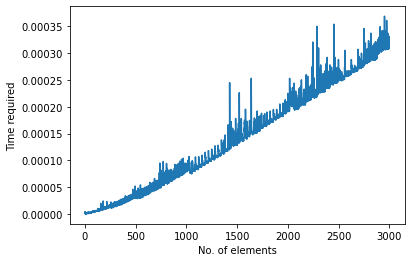

In [49]:
x=[i for i in range(3000)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("No. of elements")
plt.ylabel("Time required")
plt.plot(x,times)